In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
import cv2 as cv
import keras
from keras.preprocessing import image
from keras.layers import Conv2D,Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input
# from keras.layers.convolutional import Convolution2D
from keras.models import Sequential, Model
from keras.utils import  to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import glob

In [3]:
PATH = os.getcwd()
total_images = 0
data_path = PATH + '/data'
major = os.listdir(data_path)
full_path = []
image_labels = []
all_labels = ['crop','weed']

print("Loading file structure...\n")
for a in major:
    full_path.append("data/"+a+'/')
        

Loading file structure...



Loading training images...

crop
The total number of images in data/crop/ = 31
weed
The total number of images in data/weed/ = 27
The total number of images in data = 58


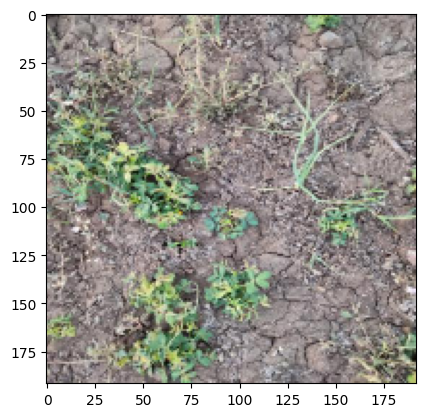

In [4]:
        
import matplotlib.pyplot as plt
#plt.imshow(Xtrain[idx])
print("Loading training images...\n")
train_images = []
for i in full_path:
    images_in_folder = 0
    label = i.split('/')[1]
    print(label)
    for file in glob.glob(i+"*.jpeg"):
        img = cv.cvtColor(cv.imread(file),cv.COLOR_BGR2RGB)
        img = cv.resize(img, (192,192))
        plt.imshow(img)
        total_images+=1
        train_images.append(img)
        image_labels.append(all_labels.index(label))
        images_in_folder += 1
    print("The total number of images in %s = %d" % (i,images_in_folder))
print("The total number of images in data = " + str(total_images))


In [5]:

X_train = np.array(train_images, np.float32) / 255.

image_labels = to_categorical(image_labels)

mean_img = X_train.mean(axis=0)
std_dev = X_train.std(axis = 0)
X_norm = (X_train - mean_img)/ std_dev
X_norm, image_labels = shuffle(X_norm, image_labels, random_state=0)

# Creating train validation split
Xtrain, Xvalid, Ytrain, Yvalid = train_test_split(X_norm, image_labels, test_size=0.2, random_state=7)

#Training the  Model
print("<<<<<< Now we will Train our model >>>>> \n")

<<<<<< Now we will Train our model >>>>> 



In [6]:
model = Sequential()
model.add(BatchNormalization(input_shape=Xtrain.shape[1:]))
model.add(Conv2D(32, kernel_size=(3, 3), activation= 'relu',padding= 'same'))
model.add(Conv2D(32, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=(3, 3), activation= 'relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 192, 192, 3)       12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 192, 192, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 190, 190, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)      

In [7]:
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape			
model.layers[0].output_shape			
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable
early_stops = EarlyStopping(patience=3, monitor='val_acc')

trained_model = model.fit(Xtrain, Ytrain, epochs = 20, shuffle = True, batch_size = 8,validation_data=(Xvalid,Yvalid))

model.save('model_final.h5')
print("<<<<  Thanks for Training Your Model Has been trained >>>>>")

Epoch 1/20


6/6 [==============================] - 5s 567ms/step - loss: 0.8394 - accuracy: 0.4348 - val_loss: 0.7275 - val_accuracy: 0.5000
Epoch 2/20
6/6 [==============================] - 2s 410ms/step - loss: 0.7455 - accuracy: 0.5435 - val_loss: 0.6749 - val_accuracy: 0.6667
Epoch 3/20
6/6 [==============================] - 2s 353ms/step - loss: 0.7092 - accuracy: 0.5652 - val_loss: 0.6796 - val_accuracy: 0.8333
Epoch 4/20
6/6 [==============================] - 2s 374ms/step - loss: 0.6707 - accuracy: 0.6739 - val_loss: 0.6721 - val_accuracy: 0.7500
Epoch 5/20
6/6 [==============================] - 2s 339ms/step - loss: 0.6470 - accuracy: 0.6522 - val_loss: 0.6233 - val_accuracy: 0.9167
Epoch 6/20
6/6 [==============================] - 2s 355ms/step - loss: 0.5739 - accuracy: 0.8043 - val_loss: 0.4910 - val_accuracy: 0.9167
Epoch 7/20
6/6 [==============================] - 2s 335ms/step - loss: 0.3328 - accuracy: 0.8696 - val_loss: 0.1943 - val_accuracy: 0.9167
Epoch 8/20
6/6 [==

c:\Python 3.11\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


(12, 192, 192, 3)
1/1 [==============================] - 0s 304ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0.00866661 0.9913334 ]
weed


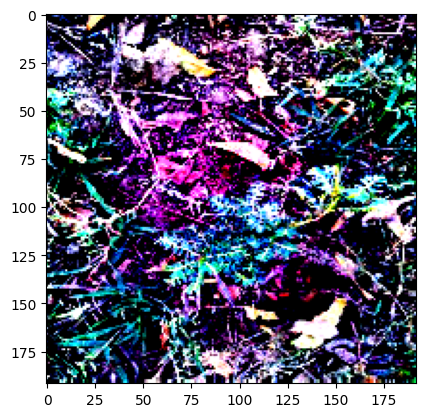

In [8]:
import matplotlib.pyplot as plt
print(Xvalid.shape)
idx=5
listt = model.predict(Xvalid)
# print(listt)
# print(Xvalid.shape)
print(listt[idx])
ans = [np.argmax(i) for i in listt]
plt.imshow(Xvalid[idx])
a=all_labels[ans[idx]]
print(a)


2/2 [==============================] - 1s 216ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[9.9999869e-01 1.2848125e-06]
crop


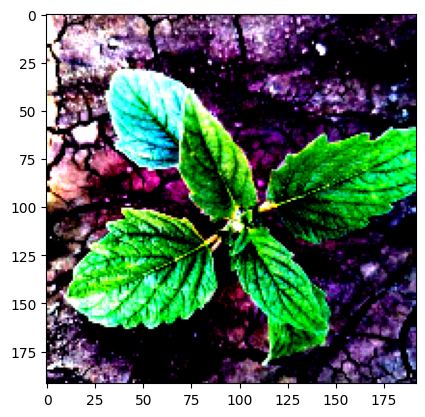

In [9]:
import matplotlib.pyplot as plt
idx=10
listt = model.predict(Xtrain)
# print(listt)
# print(Xvalid.shape)
print(listt[idx])
ans = [np.argmax(i) for i in listt]
plt.imshow(Xtrain[idx])
a=all_labels[ans[idx]]
print(a)